In [2]:
# Number of waypoints
k = 4
# Vector of timestamps
T = zeros(Int,k)
# Vector of waypoint locations
waypoints = zeros(2,k)

#Set up timestamps
T[1] = 1
T[2] = 20
T[3] = 50
T[4] = 60

endtime = 60

# Define the waypoints
# Each column is a waypoint (in 2-d)
waypoints = [ 1   4   6   1;
              1   3   0   1 ];

In [4]:
import Pkg; Pkg.add("Ipopt")
using JuMP, Ipopt

#To type λ in Julia, type \lambda then press TAB on your keyboard
λ = 0.01

m = Model(Ipopt.Optimizer)

@variable(m, x[1:2, 1:60])
@variable(m, v[1:2, 1:60])
@variable(m, u[1:2, 1:60])

@constraint(m, x_i, x[1, 1] == 1);
@constraint(m, y_i, x[2, 1] == 1);
@constraint(m, v_i, v[1, 1] == 0);
@constraint(m, v_ii, v[2, 1] == 0);

@constraint(m, movement[j in 1:2, i in 2:60], x[j, i] == x[j, i-1] + v[j, i-1]);

@constraint(m, velocity[j in 1:2, i in 2:60], v[j, i] == v[j, i-1] + u[j, i-1]);

@objective(m, Min, sum(u[i]^2 for i in 1:60) + λ*(
                                                   sum((x[j, 1] - waypoints[j, 1])^2 for j in 1:2)
                                                 + sum((x[j, 20] - waypoints[j, 2])^2 for j in 1:2)
                                                 + sum((x[j, 50] - waypoints[j, 3])^2 for j in 1:2)
                                                 + sum((x[j, 60] - waypoints[j, 4])^2 for j in 1:2)
                                                 )
            )

optimize!(m)

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed MUMPS_seq_jll ── v5.4.1+0
   Installed METIS_jll ────── v5.1.2+0
   Installed ASL_jll ──────── v0.1.3+0
   Installed OpenBLAS32_jll ─ v0.3.17+0
   Installed Ipopt ────────── v1.1.0
   Installed Ipopt_jll ────── v300.1400.400+0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [b6b21f68] + Ipopt v1.1.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [b6b21f68] + Ipopt v1.1.0
  [ae81ac8f] + ASL_jll v0.1.3+0
⌅ [9cc047cb] + Ipopt_jll v300.1400.400+0
  [d00139f3] + METIS_jll v5.1.2+0
⌅ [d7ed1dd3] + MUMPS_seq_jll v5.4.1+0
⌅ [656ef2d0] + OpenBLAS32_jll v0.3.17+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ ASL_jll
  ✓ METIS_jll
  ✓ OpenBLAS32_jll
  ✓ MUMPS_seq_jll
  ✓ Ipopt_jll
  ✓ Ipopt
  6 dependencies successfully precompiled 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      712
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       68

Total number of variables............................:      360
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      240
Total number of inequality co

   Resolving package versions...
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed LoggingExtras ──────────────── v1.0.0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Measures ───────────────────── v0.3.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed Formatting ─────────────────── v0.4.2
   Installed Contour ────────────────────── v0.6.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed PlotUtils ──────────────────── v1.3.1
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed OpenSSL ────────────────────── v1.3.2
   Installed Cairo_jll ─────

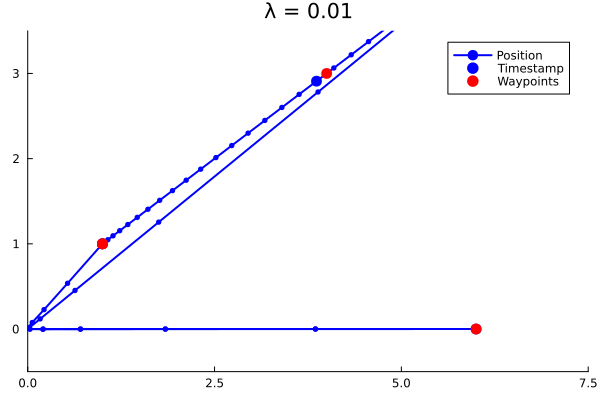

In [6]:
import Pkg; Pkg.add("Plots")
using Plots

#Plot the solution for λ = 0.01
x = value.(x)

plot(x[1,:], x[2,:], linewidth = 2, linecolor = :blue, markersize=3,
    markershape = :circle, markercolor = :blue, markerstrokewidth = 0, label = "Position")
plot!(x[1,T], x[2,T], seriestype = :scatter, markersize=6,
     markercolor = :blue, markerstrokewidth = 0, label = "Timestamp" )
plot!(waypoints[1,:], waypoints[2,:], seriestype = :scatter, markersize=6,
    markercolor = :red, markerstrokewidth = 0, grid = false, xlims = [0,7.5],
    ylims = [-0.5,3.5], label = "Waypoints", title = "λ = 0.01" )

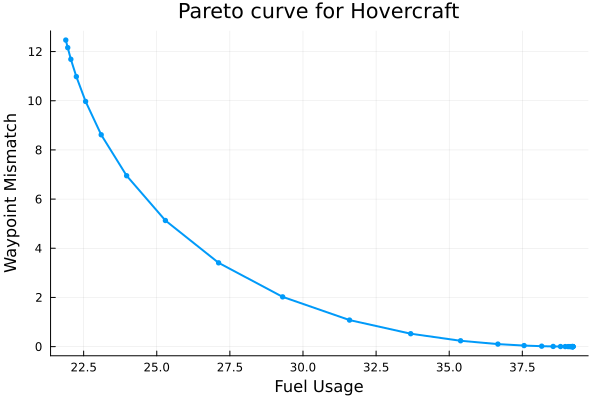

In [9]:
#Try 30 different values of lambda, logspace between
#10^-5 and 10^1
numtrials = 30
lambdas = 10 .^ LinRange(-5,1,30)

m = Model(Ipopt.Optimizer)

#Don't make the solver output info while solving
set_silent(m)

#Insert the variables and constraints of your model here

@variable(m, x[1:2, 1:60])
@variable(m, v[1:2, 1:60])
@variable(m, u[1:2, 1:60])

@constraint(m, x_i, x[1, 1] == 1);
@constraint(m, y_i, x[2, 1] == 1);
@constraint(m, v_i, v[1, 1] == 0);
@constraint(m, v_ii, v[2, 1] == 0);

@constraint(m, movement[j in 1:2, i in 2:60], x[j, i] == x[j, i-1] + v[j, i-1]);

@constraint(m, velocity[j in 1:2, i in 2:60], v[j, i] == v[j, i-1] + u[j, i-1]);

#Calculate amount of fuel used in each trial
normu = zeros(numtrials)
#Calculate amount of mismatch in each trial
normdiff = zeros(numtrials)

#Keep track of the trial number
i = 1
for λ in lambdas
        #Insert your objective with the current value of λ HERE
        @objective(m, Min, sum(u[i]^2 for i in 1:60) + λ*(
                                                   sum((x[j, 1] - waypoints[j, 1])^2 for j in 1:2)
                                                 + sum((x[j, 20] - waypoints[j, 2])^2 for j in 1:2)
                                                 + sum((x[j, 50] - waypoints[j, 3])^2 for j in 1:2)
                                                 + sum((x[j, 60] - waypoints[j, 4])^2 for j in 1:2)
                                                 )
        )

        optimize!(m)

        #Calculate amount of fuel used in this trial
        normu[i] = sum((value.(u)).^2)
        #Calculate waypoint mismatch in this trial
        normdiff[i] = sum((value.(x)[:,T]-value.(waypoints)).^2)
        i = i+1
end
;

#Plot the Pareto curve, which tradesoff between fuel usage and mismatch
plot( normu, normdiff, title="Pareto curve for Hovercraft", xlabel = "Fuel Usage", ylabel = "Waypoint Mismatch",
      linewidth = 2, markersize = 3, markerstrokewidth = 0, markershape = :circle, label = "")